# PCA

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, randomized_svd
from sklearn.datasets import load_iris, load_digits, fetch_olivetti_faces

## EXAMPLE 1

In [37]:
iris = load_iris()
feature_names = iris.feature_names
target = iris.target
data=iris.data

In [38]:
target.shape

(150,)

In [39]:
pd.DataFrame(np.c_[data, target], columns=np.append(feature_names, 'target'))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


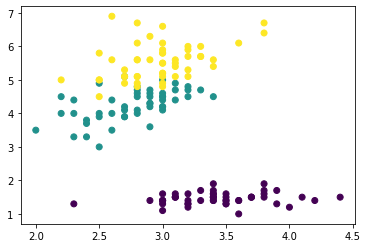

In [40]:
plt.scatter(data[:,1], data[:,2], c=target)
#plt.show()

In [41]:
pca=PCA(2)
x_proj=pca.fit_transform(data)

In [42]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

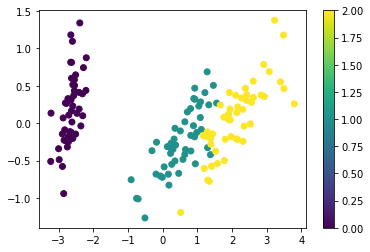

In [43]:
plt.scatter(x_proj[:,0],x_proj[:,1], c=target)
plt.colorbar()

## EXAMPLE 2

In [44]:
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [45]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Number: 7


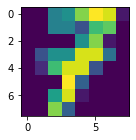

In [46]:
plt.figure(figsize=(2,2))
number=np.random.randint(digits.images.shape[1])
print('Number: %s' %number)
plt.imshow(digits.images[number])

In [47]:
X, y = digits.data, digits.target

In [48]:
#Verificando ambas matrices
np.all(digits.data[0].reshape(8,8)==digits.images[0])

True

In [49]:
pca = PCA(0.95)
digits_proj=pca.fit_transform(X)

In [50]:
print(X.shape)
print(digits_proj.shape)

(1797, 64)
(1797, 29)


In [51]:
pca=PCA(2)
digits_pca=pca.fit_transform(X)

In [52]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

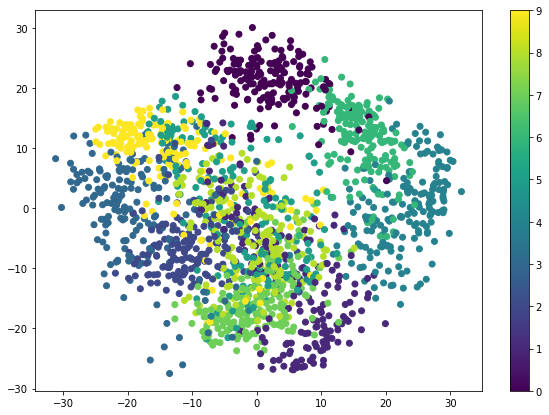

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(digits_pca[:,0], digits_pca[:,1], c=y)
plt.colorbar()

In [54]:
rate_variances = []
range_dimension = range(X.shape[1]-1)
for d in range_dimension:
    pca = PCA(d)
    X_proj = pca.fit_transform(X)
    rate_variances.append(pca.explained_variance_ratio_.sum())

Text(0, 0.5, 'Explained Variance')

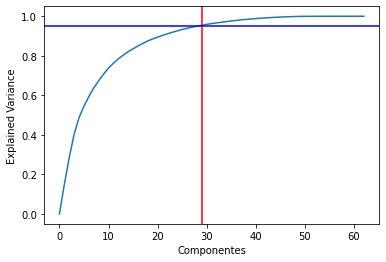

In [55]:
plt.plot(range_dimension, rate_variances, )
rate_variances = np.array(rate_variances)
k = np.argmax(rate_variances>=.95)
# Plot
plt.axvline(k, c='r')
plt.axhline(.95, c='b')
# Labels
plt.xlabel('Componentes')
plt.ylabel('Explained Variance')

In [56]:
pca_36=PCA(36)
x_proj36=pca_36.fit_transform(digits.data)

In [57]:
pca_36.components_.shape

(36, 64)

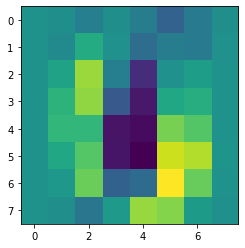

In [58]:
plt.imshow(pca_36.components_[1,:].reshape(8,8))

## EXAMPLE 3

In [59]:
olivetti=fetch_olivetti_faces()

In [60]:
print(olivetti.keys())
print(olivetti.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


Printing:

C:\Users\Erick\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


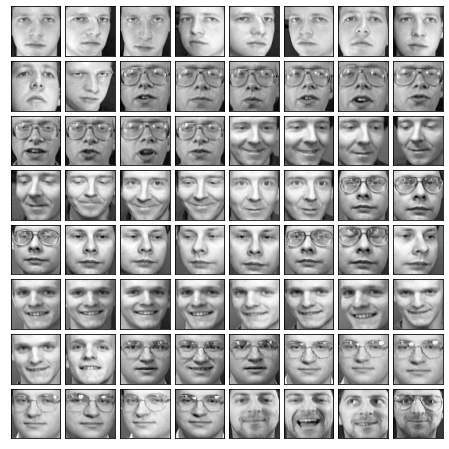

In [61]:
n = 64
rows = np.sqrt(n)
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, top=1, right=1, bottom=0, wspace=.1, hspace=.1)
for i in range(n):
    ax = fig.add_subplot(rows, rows, i+1, xticks=[], yticks=[])
    ax.imshow(olivetti.images[i], cmap=plt.cm.gray)

Analyzing with PCA:

In [62]:
pca_olivetti = PCA(64)
x_proj_olivetti = pca_olivetti.fit_transform(olivetti.data)

In [63]:
x_proj_olivetti.shape

(400, 64)

In [64]:
np.cumsum(pca_olivetti.explained_variance_ratio_)

array([0.23812719, 0.37806678, 0.45775294, 0.50773627, 0.54383475,
       0.57540417, 0.5996725 , 0.6200365 , 0.6396176 , 0.6563388 ,
       0.67229104, 0.6866608 , 0.69912827, 0.7105996 , 0.72122836,
       0.73100555, 0.74019617, 0.7483519 , 0.7558906 , 0.76336044,
       0.7703462 , 0.7764925 , 0.78233176, 0.78802896, 0.7934908 ,
       0.79880935, 0.8039475 , 0.8089059 , 0.8134825 , 0.81789434,
       0.8219143 , 0.82575613, 0.82937557, 0.83272076, 0.83592445,
       0.83908457, 0.84213567, 0.84512174, 0.8479422 , 0.85068095,
       0.8532753 , 0.85581326, 0.8582571 , 0.8606516 , 0.8629577 ,
       0.8652175 , 0.86743027, 0.86963093, 0.8717151 , 0.8737615 ,
       0.8757125 , 0.8776225 , 0.8794536 , 0.8812165 , 0.8829584 ,
       0.8846584 , 0.88632673, 0.8879458 , 0.88952273, 0.89104867,
       0.89256966, 0.89406997, 0.89552534, 0.89695275], dtype=float32)

In [65]:
pca_olivetti.components_.shape

(64, 4096)

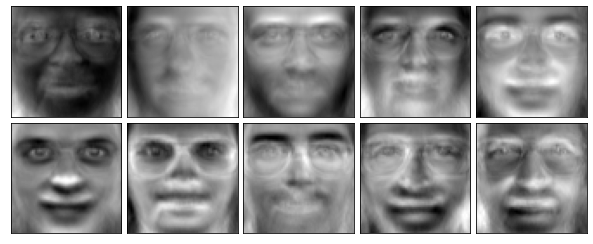

In [66]:
n=64
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, top=1, right=1, bottom=0, wspace=.05, hspace=.05)
for i in range(10):
    ax=fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca_olivetti.components_[i,:].reshape(n, n), cmap=plt.cm.gray)

Reversing image data:

In [67]:
pca_inv=pca_olivetti.inverse_transform(x_proj_olivetti)

In [68]:
print('Shape inversed', pca_inv.shape)

Shape inversed (400, 4096)


In [69]:
#Transformando a 64x64
X_inv_proj=pca_inv.reshape(400, 64, 64)

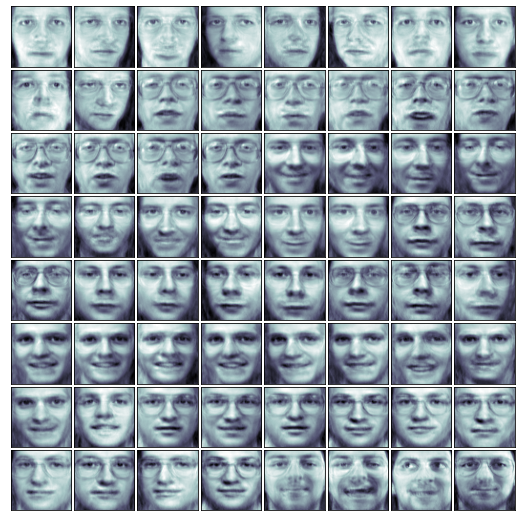

In [71]:
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(left=0, top=1, right=1, bottom=0, wspace=0.05, hspace=0.05)
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_inv_proj[i], cmap=plt.cm.bone)

## EXAMPLE 4

Experimentando con una imagen:

In [312]:
#Import image
import matplotlib.image as mpimage 

In [314]:
#reshape to create matrix mxn
calvin_re = calvin.reshape((calvin.shape[0], calvin.shape[1] * calvin.shape[2]))
print('Reshape', calvin_re.shape)

#creatin PCA object
calvin_pca = PCA(850)
calvin_proj = calvin_pca.fit_transform(calvin_re)

Reshape (852, 2160)


In [315]:
print(calvin_proj.shape)
print(np.sum(calvin_pca.explained_variance_ratio_))

(852, 850)
0.9999999992115322


In [316]:
#Now, let's inverse transform to visualize image
calvin_inv = calvin_pca.inverse_transform(calvin_proj)
calvin_inv.shape

(852, 2160)

In [317]:
calvin_compress=calvin_inv.reshape(calvin.shape)
print(calvin_compress.shape)

(852, 720, 3)


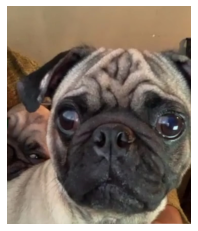

In [318]:
plt.axis('off')
plt.imshow(calvin_compress.astype('uint8'))

In [338]:
components = np.linspace(2, calvin.shape[0], 24, dtype=int)
print( components)

[  2  38  75 112 149 186 223 260 297 334 371 408 445 482 519 556 593 630
 667 704 741 778 815 852]


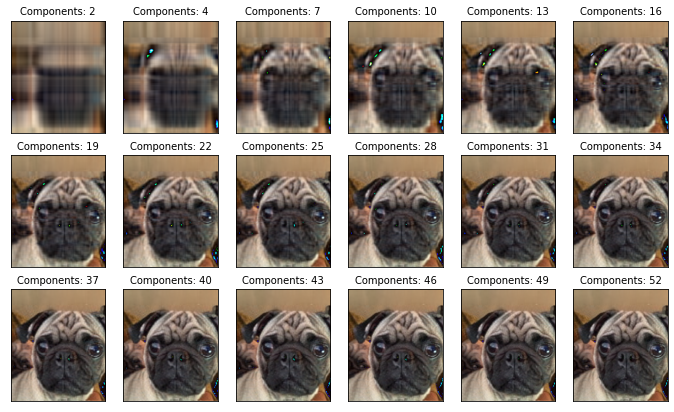

In [361]:
components = np.linspace(2, calvin.shape[0]-800, 18, dtype=int)
fig=plt.figure(figsize=(12,7))
count=0
variances=[]
fig.subplots_adjust(wspace=0.05, hspace=0.2)

for i in components:
    pca = PCA(i)
    x_proj = pca.fit_transform(calvin_re)
    x_inv = pca.inverse_transform(x_proj)
    x_inv_re = x_inv.reshape(calvin.shape)
    count+=1
    
    #Plot
    ax=fig.add_subplot(3,6, count, xticks=[], yticks=[])
    ax.set_title('Components: '+str(i), fontsize=10)
    ax.imshow(x_inv_re.astype('uint8'))